### DiVAS 1.01

A software used to automate daily planning. Currently samples from a distribution, but ideally with v2.0+, I would like to add some supervised models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prob_distributions import generate_dist

Using probability distributions to generate a new calendar set and using that to check the orthonormality. Will explain more.

In [3]:
sample_size = 4000

In [9]:
cats = [([6], 0.2, sample_size, "Wake up"), 
        ([6.5, 14], [0.12, 0.88], sample_size, "Exercise"), 
        ([8, 15, 18], [0.33, 0.33, 0.33], sample_size, "Work"),
        ([12], 0.2, sample_size, "Lunch"), 
        ([16], 0.2, sample_size, "Tea"), 
        ([21.5], 0.2, sample_size, "Wind Down")]

Generate distribution

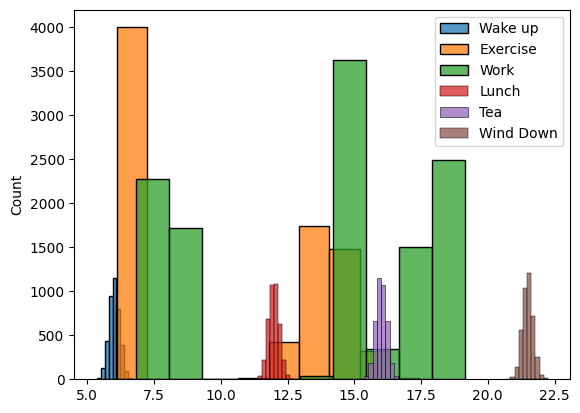

In [11]:
for c in cats:
    this_histplot = sns.histplot(generate_dist(c[0], c[1], c[2]), bins = 10, label = c[3])

plt.legend(loc = 'best')

While the above is good, to ensure that we don't randomly have 'gym' before 'wake up'. Essentially, right now, we have the probability distribution to sample from. Now we need to make sure it samples correctly. Maybe normalizing the distribution might be useful?